# Hotel Review Classification

> ### Team 1: Renetta Nelson, Jacqueline Urenda

> ### June 26, 2023


> ### Github Repository: https://github.com/RenettaNelson/ADS-509---Applied-Text-Mining---Team-1/tree/main 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import csv
import time
import random
from collections import OrderedDict
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import pyLDAvis.lda_model
import nltk
import random
import time



from nltk.stem import WordNetLemmatizer
from random import randint
from textblob import TextBlob
from time import sleep
import warnings
warnings.filterwarnings("ignore")


color = sns.color_palette()
%matplotlib inline



from collections import Counter, defaultdict
from string import punctuation
from nltk.corpus import stopwords
from nltk.metrics import ConfusionMatrix

from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split


from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator


In [2]:
#import nltk
#nltk.download('wordnet')

## Retrieving Data from Website

In [3]:

# Retrieve Data using URL links from each page of Tripadvisor Website

hotel_page1 = ("https://www.tripadvisor.in/Hotels-g60750-San_Diego_California-Hotels.html")
hotel_page2 = ("https://www.tripadvisor.in/Hotels-g60750-oa30-San_Diego_California-Hotels.html")
hotel_page3 = ("https://www.tripadvisor.in/Hotels-g60750-oa60-San_Diego_California-Hotels.html")
hotel_page4 = ("https://www.tripadvisor.in/Hotels-g60750-oa90-San_Diego_California-Hotels.html")
hotel_page5 = ("https://www.tripadvisor.in/Hotels-g60750-oa120-San_Diego_California-Hotels.html")
hotel_page6 = ("https://www.tripadvisor.in/Hotels-g60750-oa150-San_Diego_California-Hotels.html")
hotel_page7 = ("https://www.tripadvisor.in/Hotels-g60750-oa180-San_Diego_California-Hotels.html")
hotel_page8 = ("https://www.tripadvisor.in/Hotels-g60750-oa210-San_Diego_California-Hotels.html")
hotel_page9 = ("https://www.tripadvisor.in/Hotels-g60750-oa240-San_Diego_California-Hotels.html")
hotel_page10 = ("https://www.tripadvisor.in/Hotels-g60750-oa270-San_Diego_California-Hotels.html")

user_agent = ( {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \ AppleWebKit/537.36 (KHTML, like Gecko) \ Chrome/90.0.4430.212 Safari/537.36',
                'Accept-Language': 'en-US, en'})


hp1= requests.get(hotel_page1, headers = user_agent)

hp2= requests.get(hotel_page2, headers = user_agent)

hp3= requests.get(hotel_page3, headers = user_agent)

hp4= requests.get(hotel_page4, headers = user_agent)

hp5= requests.get(hotel_page5, headers = user_agent)

hp6= requests.get(hotel_page6, headers = user_agent)

hp7= requests.get(hotel_page7, headers = user_agent)

hp8= requests.get(hotel_page8, headers = user_agent)

hp9= requests.get(hotel_page9, headers = user_agent)

hp10= requests.get(hotel_page10, headers = user_agent)
time.sleep(5 + 10*random.random())

- Data from the Tripadvisor was retrieved from multiple pages. Each page was assigned its own variable and requests were made to retrieve data from each variable.

## Extracting the Data

### Data Extraction for Each Hotel

In [4]:
# Create functions to extract data from pages retrieved in code above

def extract(h_page, hotel_names, hotel_ratings, hotel_reviews, hotel_prices):

    h_content = BeautifulSoup(h_page.content, 'html.parser')

    for hotel_name in h_content.find_all('div', {'class': 'listing_title'}):
        hotel_names.append(hotel_name.text.strip())


    for hotel_rating in h_content.find_all('a', {'class': 'ui_bubble_rating'}):
        hotel_ratings.append(hotel_rating['alt'])

    for hotel_review in h_content.find_all('a', {'class': 'review_count'}):
        hotel_reviews.append(hotel_review.text.strip())

    for hotel_price in h_content.find_all('span', {'class': 'fwoto'}):
        print("In pricing")
        hotel_prices.append(hotel_price.span.text.replace('₹','').strip())
    

    return hotel_names, hotel_ratings, hotel_reviews, hotel_prices


def extract_test(hotel_names, hotel_ratings, hotel_reviews, hotel_prices):
    print("Lengths of Dataset Columns")
    print("Hotel Names: ", len(hotel_names))
    print("Hotel Ratings: ", len(hotel_ratings))
    print("Hotel Reviews: ", len(hotel_reviews))
    print("Hotel Prices: ", len(hotel_prices))

In [5]:
hotel_names = []
hotel_ratings = []
hotel_reviews = []
hotel_prices = []


hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp1, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp2, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp3, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp4, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp5, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp6, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp7, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp8, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp9, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)
hotel_names, hotel_ratings, hotel_reviews, hotel_prices = extract(hp10, hotel_names, hotel_ratings, hotel_reviews, hotel_prices)




- Since data is being extracted from multiple websites, a function was created. The function takes in the retrieved data from provided url pages. It also takes in lists for the wanted data. The function extracts the data from the input variable and appends the data into the corresponding lists. The lists are initiated before the function. When the functions are called, the updated lists are loaded into the variables so it continually adds the data to the same lists until all the data from 10 pages are added to the lists.

In [6]:
extract_test(hotel_names, hotel_ratings, hotel_reviews, hotel_prices)

Lengths of Dataset Columns
Hotel Names:  600
Hotel Ratings:  300
Hotel Reviews:  300
Hotel Prices:  0


- A test function was created to ensure all the data was extracted successfully

### Data Extraction of Reviews for Each Hotel

In [7]:
def extract_review(url):
    
    hotel_rev = []
    hotel_rev2 = []
    hotel_rev3 = []

    review_page= (url)

    user_agent = ( {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \ AppleWebKit/537.36 (KHTML, like Gecko) \ Chrome/90.0.4430.212 Safari/537.36',
                    'Accept-Language': 'en-US, en'})


    rp1= requests.get(review_page, headers = user_agent)

    h_content = BeautifulSoup(rp1.content, 'html.parser')


    for rp_1 in h_content.findAll('span', {'class':'QewHA H4 _a'}):
        hotel_rev.append(rp_1.span.text.strip())


    for rp_2 in h_content.findAll('a', {'class':'Qwuub'}):
        hotel_rev2.append(rp_2.text.strip())

    for rp_3 in h_content.findAll("span", {"class": "ui_bubble_rating"}):
        hotel_rev3.append(rp_3)


    return hotel_rev2, hotel_rev3, hotel_rev



def extract_links(hotel_link, links):

    for review in hotel_link.findAll('a',{'class': 'review_count'}):
        a = review['href']
        a = 'https://www.tripadvisor.in'+ a

        a= a[:(a.find('Reviews')+7)] + '-or{}' + a[(a.find('Reviews')+7):]
  
        links.append(a)
    #return links

In [8]:
hotel_rev = BeautifulSoup(hp1.content, 'html.parser')
hotel_rev2 = BeautifulSoup(hp2.content, "html.parser")
hotel_rev3 = BeautifulSoup(hp3.content, "html.parser")
hotel_rev4 = BeautifulSoup(hp4.content, "html.parser")
hotel_rev5 = BeautifulSoup(hp5.content, "html.parser")
hotel_rev6 = BeautifulSoup(hp6.content, "html.parser")
hotel_rev7 = BeautifulSoup(hp7.content, "html.parser")
hotel_rev8 = BeautifulSoup(hp8.content, "html.parser")
hotel_rev9 = BeautifulSoup(hp9.content, "html.parser")
hotel_rev10 = BeautifulSoup(hp10.content, "html.parser")


links = []

extract_links(hotel_rev, links)
extract_links(hotel_rev2, links)
extract_links(hotel_rev3, links)
extract_links(hotel_rev4, links)
extract_links(hotel_rev5, links)
extract_links(hotel_rev6, links)
extract_links(hotel_rev7, links)
extract_links(hotel_rev8, links)
extract_links(hotel_rev9, links)
extract_links(hotel_rev10, links)



- Each hotel has a corresponding review page that consist of the title, summary, and rating. A function was created to extract the links for each review page for the corresponding hotel page. The links are appended into a list. This list will be the input to another function which will extract the information from the review page. This function will be called when transforming the data.

## Data Transformation

In [9]:
def cleaning_data(hotel_names, hotel_ratings, hotel_reviews, links):
    hotel_names2 = []
    hotel_names3 = []
    hotel_names4 = []
    hotel_reviews2 = []
    hotel_reviews3 = []
    hotel_ratings2 = []
    hotel_ratings3 = []
    name_index = []
    links2 = []
    num = 0
    temp = 0

    # removing duplicates of hotel names
    n = 0
    for i in hotel_names:
        if n % 2 == 0:
            n = n + 1
            hotel_names2.append(i)
        else:
            n = n + 1
            continue 

 

    # remove "Sponsored" hotels

    for i in hotel_names2:
        #print(i)
        x = i.split(" ")
        if x[0] == "Sponsored":
            name_index.append(num)
            num = num + 1
            continue
        else:
            hotel_names3.append(" ".join(x))
            num = num + 1



    # removing numbers from hotel names

    for i in hotel_names3:
        x = i.split(" ")
        del x[0]
        hotel_names4.append(" ".join(x))



    # Removing word "reviews" from column values and converting to numerical 

    for i in hotel_reviews:
        x = i.split(" ")
        for y in x:
            c = re.sub(r'[^\w\s]', '', y)
            if c.isdigit():
                hotel_reviews2.append(c)
            else:
                continue

    hotel_reviews2 = [eval(i) for i in hotel_reviews2]


    # Removing Sponsored hotel reviews



    for i in range(len(hotel_reviews2)):

        if i not in name_index:
                hotel_reviews3.append(hotel_reviews2[i])
        else:
            continue



    # Removing Sponsored hotel ratings

   
    for i in range(len(hotel_ratings)):

        if i not in name_index:
                hotel_ratings2.append(hotel_ratings[i])
        else:
            continue
        


    # Only taking rating and converting into numerical 

    for i in hotel_ratings2:
        x = i.split(" ")
        hotel_ratings3.append(x[0])

    hotel_ratings3 = [eval(i) for i in hotel_ratings3]



    # removing links to reviews for sponsored hotels


    for i in range(len(links)):

        if i not in name_index:
                links2.append(links[i])
        else:
            continue

    
    
    # Extracting review content from links

    reviews = []
    rev_dict = {}
    rev_title = []
    rev_rate = []
    rev_summary = []


    for link in links2:
        title, rate, summary = extract_review(link)
        rev_title.append(title)
        rev_rate.append(rate)
        rev_summary.append(summary)



    # Converting each review rating to numerical

    rev_rate2 = []

    rev_rate4 = []

    for i in rev_rate:
        temp2 = []
        for j in i:
            temp2.append(str(j))
        rev_rate2.append(temp2)
        


    for x in rev_rate2:
        temp3 = []
        for y in x:
            #print(y)
            y1 = y.split(" ")
            y2 = y1[2].split('"')
            y3 = y2[0].split("_")
            n = int(y3[1]) / 10
            temp3.append(n)
            #print(y3)
        rev_rate4.append(temp3)



    return hotel_names4, hotel_ratings3, hotel_reviews3, name_index, rev_title, rev_rate4, rev_summary



def clean_data_test(hotel_names3, hotel_ratings2, hotel_reviews2):
    print("Lengths of Dataset Columns")
    print("Hotel Names: ", len(hotel_names3))
    print("Hotel Ratings: ", len(hotel_ratings2))
    print("Hotel Reviews: ", len(hotel_reviews2))

In [10]:
hotel_names4, hotel_ratings3, hotel_reviews3, name_index, rev_title, rev_rate4, rev_summary = cleaning_data(hotel_names, hotel_ratings, hotel_reviews, links)


- A function called cleaning_data was created to organize and structure the data so it can be loaded into a dataframe. In this function, the following were implemented: removing duplicates (this includes the ads for sponsored hotels), removing the numbers from in front of the hotel names, removing the sponsored reviews and ratings (which are considered duplicates as well), converting the ratings and number of reviews columns to numerical values, and extracting the review information from the links to put into lists that correspond to each hotel. The final results to each transformation were loaded into variables. 

In [11]:
clean_data_test(hotel_names4, hotel_ratings3, hotel_reviews3)

Lengths of Dataset Columns
Hotel Names:  300
Hotel Ratings:  300
Hotel Reviews:  300


- A test function was created to ensure no data was lost during this transformation. If all the variables are equal to the same number as the extracted test, then the data cleaning was successful.

## Loading Cleaned Data into a DataFrame

### Loading Hotel Data

In [12]:

hotels_dict = {}

# Load data into dictionary

hotels_dict = {'names':hotel_names4, 'num_reviews':hotel_reviews3, 'ratings':hotel_ratings3}   #, 'costs':hotel_prices[:37]}


hotels_df = pd.DataFrame.from_dict(hotels_dict)
hotels_df.head(10)

,names,num_reviews,ratings
0,Bahia Resort Hotel,6381,4.5
1,Manchester Grand Hyatt San Diego,12658,4.5
2,Embassy Suites by Hilton San Diego Bay Downtown,3446,4.5
3,San Diego Mission Bay Resort,1375,4.0
4,Paradise Point Resort & Spa,3209,4.0
5,Catamaran Resort Hotel and Spa,6756,4.5
6,Best Western Plus Island Palms Hotel & Marina,4853,4.5
7,San Diego Marriott La Jolla,1509,4.5
8,Old Town Inn,2413,4.5
9,Marriott Marquis San Diego Marina,4891,4.0


### Loading Reviews for Each Hotel

In [13]:

hotels_df["review_title"] = rev_title
hotels_df["review_rating"] = rev_rate4
hotels_df["review_summary"] = rev_summary

hotels_df.head(10)

,names,num_reviews,ratings,review_title,review_rating,review_summary
0,Bahia Resort Hotel,6381,4.5,"[Best summer vacation 🌞, Outstanding large bou...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[The check in with Karina was amazing and smoo...
1,Manchester Grand Hyatt San Diego,12658,4.5,"[Did not disappoint!, Great Stay Near Conventi...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[This was a great place to stay since it was m...
2,Embassy Suites by Hilton San Diego Bay Downtown,3446,4.5,"[Kitchen staff extraordinaire, Absolutely beau...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The kitchen staff was tremendous. The four ge...
3,San Diego Mission Bay Resort,1375,4.0,"[San Diego Family Trip, Excellent from start t...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Great place to stay! Keep in mind that parkin...
4,Paradise Point Resort & Spa,3209,4.0,"[Worn-out, not luxury resort in a lovely locat...","[4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 5.0, 5.0, ...","[Widely spaced out ""luxury"" rooms that date fr..."
5,Catamaran Resort Hotel and Spa,6756,4.5,"[Catamaran Hotel and Resort., Phenomenal stay!...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The hotel room was super spacious. We loved t...
6,Best Western Plus Island Palms Hotel & Marina,4853,4.5,[Nice stay but pay for parking and no free bre...,"[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.0, ...",[Great location. Rooms were spacious and had r...
7,San Diego Marriott La Jolla,1509,4.5,"[Best Hotel Experience is amazing!, Amazing ti...","[4.5, 4.5, 4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.0, ...",[I have to first off say the food is absolutel...
8,Old Town Inn,2413,4.5,"[The best is the staff at the reception, the r...","[4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, ...","[The team are very friendly especially Matt, t..."
9,Marriott Marquis San Diego Marina,4891,4.0,"[Nice hotel but no lounge on weekends., A Good...","[4.0, 4.0, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The hotel is quite nice. Apparently just fin...


- All the data was loaded into a dataframe called hotels_df. This dataframe will be used to access all the extracted information for the rest of this project.

## Exploratory Data Analysis

### Plotting the Distribution of Hotel Ratings

In [14]:
color = sns.color_palette()

fig = px.histogram(hotels_df, x="ratings",  width=800, height=400)
fig.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig.update_layout(title_text='Hotel Ratings Distribution')
fig.show()

 - A histogram was generated for the ratings of each hotel. There are less hotels with a rating of less than 3. The majority of hotel guests that have written a review have a positive experience. 

## Data Preparation

### Functions

In [15]:
#punctuation
punctuation = set(punctuation) 
tw_punct = punctuation - {"#"}

#stopwords and null removal

sw = stopwords.words("english")
sw = sw + ['nan']

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")


# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Returns a list of descriptive statistics
    """

    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens/num_tokens
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])    

# Function to remove stop words:

def remove_stop(tokens) :
    

    return[t for t in tokens if t not in sw]
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    return([item.lower() for item in whitespace_pattern.split(text)])
    

full_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]


def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

- Functions were created for the preparation on the text data. The functions implemented the following: removed the punctuation and stopwords, generated descriptive statistics, tokenized the text data, and prepared the data using a pipeline that was input into the function.

### Tokenization

In [16]:

hotels_df['title_tokens']= hotels_df['review_title'].apply(prepare, pipeline=full_pipeline)
hotels_df['summary_tokens']= hotels_df['review_summary'].apply(prepare, pipeline=full_pipeline)

hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens
0,Bahia Resort Hotel,6381,4.5,"[Best summer vacation 🌞, Outstanding large bou...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[The check in with Karina was amazing and smoo...,"[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,..."
1,Manchester Grand Hyatt San Diego,12658,4.5,"[Did not disappoint!, Great Stay Near Conventi...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[This was a great place to stay since it was m...,"[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s..."
2,Embassy Suites by Hilton San Diego Bay Downtown,3446,4.5,"[Kitchen staff extraordinaire, Absolutely beau...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The kitchen staff was tremendous. The four ge...,"[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentlemen, ..."
3,San Diego Mission Bay Resort,1375,4.0,"[San Diego Family Trip, Excellent from start t...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Great place to stay! Keep in mind that parkin...,"[san, diego, family, trip, excellent, start, f...","[great, place, stay, keep, mind, parking, fees..."
4,Paradise Point Resort & Spa,3209,4.0,"[Worn-out, not luxury resort in a lovely locat...","[4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 5.0, 5.0, ...","[Widely spaced out ""luxury"" rooms that date fr...","[wornout, luxury, resort, lovely, location, be...","[widely, spaced, luxury, rooms, date, 1970s, m..."


- Tokens for each text column was added as a new column to the corresponding hotel. The text columns are review_summary and review_title.

### Lemmatization

In [17]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

hotels_df['title_lemma'] = hotels_df['title_tokens'].apply(lambda x: word_lemmatizer(x))
hotels_df['summary_lemma'] = hotels_df['summary_tokens'].apply(lambda x: word_lemmatizer(x))

hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens,title_lemma,summary_lemma
0,Bahia Resort Hotel,6381,4.5,"[Best summer vacation 🌞, Outstanding large bou...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[The check in with Karina was amazing and smoo...,"[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,...","[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,..."
1,Manchester Grand Hyatt San Diego,12658,4.5,"[Did not disappoint!, Great Stay Near Conventi...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[This was a great place to stay since it was m...,"[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s...","[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s..."
2,Embassy Suites by Hilton San Diego Bay Downtown,3446,4.5,"[Kitchen staff extraordinaire, Absolutely beau...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The kitchen staff was tremendous. The four ge...,"[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentlemen, ...","[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentleman, ..."
3,San Diego Mission Bay Resort,1375,4.0,"[San Diego Family Trip, Excellent from start t...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Great place to stay! Keep in mind that parkin...,"[san, diego, family, trip, excellent, start, f...","[great, place, stay, keep, mind, parking, fees...","[san, diego, family, trip, excellent, start, f...","[great, place, stay, keep, mind, parking, fee,..."
4,Paradise Point Resort & Spa,3209,4.0,"[Worn-out, not luxury resort in a lovely locat...","[4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 5.0, 5.0, ...","[Widely spaced out ""luxury"" rooms that date fr...","[wornout, luxury, resort, lovely, location, be...","[widely, spaced, luxury, rooms, date, 1970s, m...","[wornout, luxury, resort, lovely, location, be...","[widely, spaced, luxury, room, date, 1970s, mi..."


- Lemmatizations for each token column was added as a new column to the corresponding hotel. The token columns are title_tokens and summary_tokens.

### Descriptive Statistics

In [18]:

for i in range(3):
    print(hotels_df["names"][i])
    print(descriptive_stats(hotels_df["title_tokens"][i]))
    print("\n")



Bahia Resort Hotel
There are 31 tokens in the data.
There are 25 unique tokens in the data.
There are 185 characters in the data.
The lexical diversity is 0.806 in the data.
[31, 25, 0.8064516129032258, 185]


Manchester Grand Hyatt San Diego
There are 24 tokens in the data.
There are 22 unique tokens in the data.
There are 156 characters in the data.
The lexical diversity is 0.917 in the data.
[24, 22, 0.9166666666666666, 156]


Embassy Suites by Hilton San Diego Bay Downtown
There are 39 tokens in the data.
There are 33 unique tokens in the data.
There are 264 characters in the data.
The lexical diversity is 0.846 in the data.
[39, 33, 0.8461538461538461, 264]




- Since there are hundreds of hotels, we implemented the descriptive statistics for only the first three hotels. This shows the number of tokens, unique tokens, characters, and lexical diversity for the hotel page.

## Sentiment Analysis

### Calculating Sentiment

In [19]:
#converting lemmatized data into string

hotels_df['title_lemma_str'] = [' '.join(map(str,l)) for l in hotels_df['title_lemma']]
hotels_df['summary_lemma_str'] = [' '.join(map(str,l)) for l in hotels_df['summary_lemma']]


hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens,title_lemma,summary_lemma,title_lemma_str,summary_lemma_str
0,Bahia Resort Hotel,6381,4.5,"[Best summer vacation 🌞, Outstanding large bou...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[The check in with Karina was amazing and smoo...,"[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,...","[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,...",best summer vacation 🌞 outstanding large bouti...,check karina amazing smooth went beyond making...
1,Manchester Grand Hyatt San Diego,12658,4.5,"[Did not disappoint!, Great Stay Near Conventi...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[This was a great place to stay since it was m...,"[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s...","[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s...",disappoint great stay near convention center o...,great place stay since first trip ca san diego...
2,Embassy Suites by Hilton San Diego Bay Downtown,3446,4.5,"[Kitchen staff extraordinaire, Absolutely beau...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The kitchen staff was tremendous. The four ge...,"[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentlemen, ...","[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentleman, ...",kitchen staff extraordinaire absolutely beauti...,kitchen staff tremendous four gentleman made o...
3,San Diego Mission Bay Resort,1375,4.0,"[San Diego Family Trip, Excellent from start t...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Great place to stay! Keep in mind that parkin...,"[san, diego, family, trip, excellent, start, f...","[great, place, stay, keep, mind, parking, fees...","[san, diego, family, trip, excellent, start, f...","[great, place, stay, keep, mind, parking, fee,...",san diego family trip excellent start finish e...,great place stay keep mind parking fee resort ...
4,Paradise Point Resort & Spa,3209,4.0,"[Worn-out, not luxury resort in a lovely locat...","[4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 5.0, 5.0, ...","[Widely spaced out ""luxury"" rooms that date fr...","[wornout, luxury, resort, lovely, location, be...","[widely, spaced, luxury, rooms, date, 1970s, m...","[wornout, luxury, resort, lovely, location, be...","[widely, spaced, luxury, room, date, 1970s, mi...",wornout luxury resort lovely location beautifu...,widely spaced luxury room date 1970s mismatche...


In [20]:
#Calculating the sentiment based on lemmatizated data

hotels_df['title_sentiment'] = hotels_df['title_lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
hotels_df['summary_sentiment'] = hotels_df['summary_lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

hotels_df.head()

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens,title_lemma,summary_lemma,title_lemma_str,summary_lemma_str,title_sentiment,summary_sentiment
0,Bahia Resort Hotel,6381,4.5,"[Best summer vacation 🌞, Outstanding large bou...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[The check in with Karina was amazing and smoo...,"[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,...","[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,...",best summer vacation 🌞 outstanding large bouti...,check karina amazing smooth went beyond making...,0.690476,0.360986
1,Manchester Grand Hyatt San Diego,12658,4.5,"[Did not disappoint!, Great Stay Near Conventi...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[This was a great place to stay since it was m...,"[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s...","[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s...",disappoint great stay near convention center o...,great place stay since first trip ca san diego...,0.323077,0.289982
2,Embassy Suites by Hilton San Diego Bay Downtown,3446,4.5,"[Kitchen staff extraordinaire, Absolutely beau...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The kitchen staff was tremendous. The four ge...,"[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentlemen, ...","[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentleman, ...",kitchen staff extraordinaire absolutely beauti...,kitchen staff tremendous four gentleman made o...,0.559722,0.431501
3,San Diego Mission Bay Resort,1375,4.0,"[San Diego Family Trip, Excellent from start t...","[4.0, 4.0, 4.5, 4.0, 4.0, 3.5, 5.0, 4.5, 4.5, ...",[Great place to stay! Keep in mind that parkin...,"[san, diego, family, trip, excellent, start, f...","[great, place, stay, keep, mind, parking, fees...","[san, diego, family, trip, excellent, start, f...","[great, place, stay, keep, mind, parking, fee,...",san diego family trip excellent start finish e...,great place stay keep mind parking fee resort ...,0.468485,0.391134
4,Paradise Point Resort & Spa,3209,4.0,"[Worn-out, not luxury resort in a lovely locat...","[4.0, 4.0, 4.5, 4.0, 4.0, 4.0, 4.5, 5.0, 5.0, ...","[Widely spaced out ""luxury"" rooms that date fr...","[wornout, luxury, resort, lovely, location, be...","[widely, spaced, luxury, rooms, date, 1970s, m...","[wornout, luxury, resort, lovely, location, be...","[widely, spaced, luxury, room, date, 1970s, mi...",wornout luxury resort lovely location beautifu...,widely spaced luxury room date 1970s mismatche...,0.480580,0.229936


### Distribution Plot

In [21]:

fig2 = px.histogram(hotels_df, x="title_sentiment",  width=800, height=400)
fig2.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig2.update_layout(title_text='Review Title Sentiment Distribution')
fig2.show()


fig3 = px.histogram(hotels_df, x="summary_sentiment",  width=800, height=400)
fig3.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=1.5)
fig3.update_layout(title_text='Review Summary Sentiment Distribution')
fig3.show()

- This section focuses on the sentiment analysis. First, the lemmatized data was converted into a string and added as a column into the dataframe. Those columns were then used to calculate the seniment. This was added as another column in the dataframe. Those columns were then plotted as a histogram to display the distribution of the review titles and review summaries. The sentiment distribution looks normal.

## Word Clouds

### Hotel Review Titles

In [22]:
# Append all words from title review into one list

title_words = hotels_df["title_lemma"]

total_words = []

for x in title_words:
    total_words = total_words + x

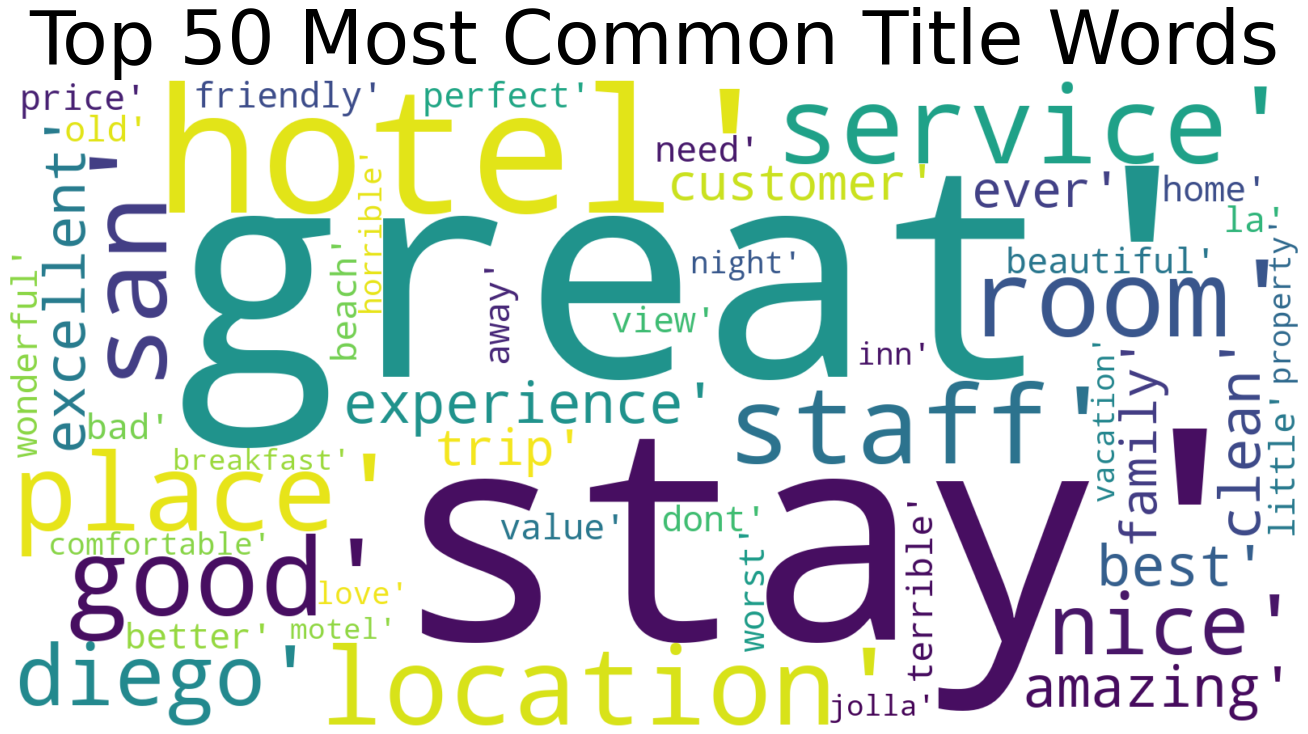

In [23]:
# Plot the word cloud for top 50 from generated list above

mode = FreqDist(total_words).most_common(50)

cloud = WordCloud(width=1600, height = 800, background_color = 'white').generate(str(mode))

fig = plt.figure(figsize=(30, 10), facecolor='white')
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Title Words', fontsize = 75)
plt.tight_layout(pad=0)
plt.show()


### Hotel Review Summaries

In [24]:
# Append all words from summaries into one list

title_words = hotels_df["summary_lemma"]

total_words = []

for x in title_words:
    total_words = total_words + x
    

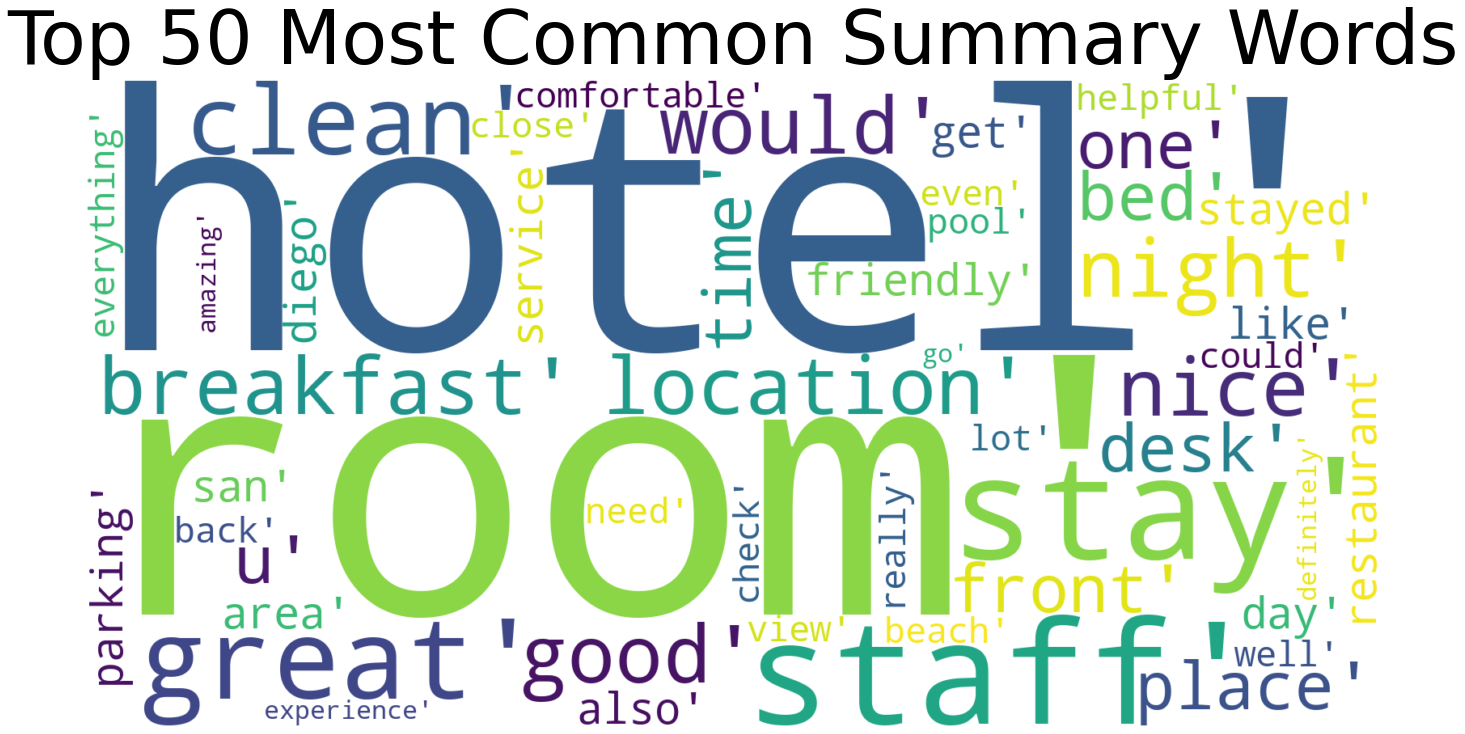

In [25]:
# Plot the word cloud for top 50 from generated list above

mode = FreqDist(total_words).most_common(50)

cloud = WordCloud(width=1600, height = 800, background_color = 'white').generate(str(mode))

fig = plt.figure(figsize=(30, 10), facecolor='white')
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Summary Words', fontsize = 75)
plt.tight_layout(pad=0)
plt.show()


- In this section, word clouds for the text data columns were generated.

## Training & Testing Split

In [26]:
#reassigning ratings 

hotels_df.loc[(hotels_df['ratings'] >= 4.5), 'score'] = 5
hotels_df.loc[(hotels_df['ratings'] >= 4) & (hotels_df['ratings'] < 4.5), 'score'] = 4
hotels_df.loc[(hotels_df['ratings'] >= 3) & (hotels_df['ratings'] < 4), 'score'] = 3
hotels_df.loc[(hotels_df['ratings'] >= 2) & (hotels_df['ratings'] < 3), 'score'] = 2
hotels_df.loc[(hotels_df['ratings'] < 2), 'score'] = 1

In [27]:
hotels_df.head(3)

,names,num_reviews,ratings,review_title,review_rating,review_summary,title_tokens,summary_tokens,title_lemma,summary_lemma,title_lemma_str,summary_lemma_str,title_sentiment,summary_sentiment,score
0,Bahia Resort Hotel,6381,4.5,"[Best summer vacation 🌞, Outstanding large bou...","[4.5, 4.5, 4.5, 4.0, 4.5, 4.0, 4.5, 4.0, 4.5, ...",[The check in with Karina was amazing and smoo...,"[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,...","[best, summer, vacation, 🌞, outstanding, large...","[check, karina, amazing, smooth, went, beyond,...",best summer vacation 🌞 outstanding large bouti...,check karina amazing smooth went beyond making...,0.690476,0.360986,5.0
1,Manchester Grand Hyatt San Diego,12658,4.5,"[Did not disappoint!, Great Stay Near Conventi...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[This was a great place to stay since it was m...,"[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s...","[disappoint, great, stay, near, convention, ce...","[great, place, stay, since, first, trip, ca, s...",disappoint great stay near convention center o...,great place stay since first trip ca san diego...,0.323077,0.289982,5.0
2,Embassy Suites by Hilton San Diego Bay Downtown,3446,4.5,"[Kitchen staff extraordinaire, Absolutely beau...","[4.5, 4.5, 5.0, 4.5, 4.5, 4.0, 4.5, 4.5, 4.5, ...",[The kitchen staff was tremendous. The four ge...,"[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentlemen, ...","[kitchen, staff, extraordinaire, absolutely, b...","[kitchen, staff, tremendous, four, gentleman, ...",kitchen staff extraordinaire absolutely beauti...,kitchen staff tremendous four gentleman made o...,0.559722,0.431501,5.0


In [28]:
X = hotels_df['summary_lemma_str']
y = hotels_df['score']
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


- Since classification models are being implemented, all continuous numbers were converted into whole numbers and added as a new column called score in the dataframe. This column was used as the target column in the train_test_split function. It was then converted into numerical values. The training set size is 80% of the data while the test size is 20% of the data.

## Classification Models

In [29]:
tfidf = TfidfVectorizer()
SVC = LinearSVC(random_state=42)

from sklearn.pipeline import make_pipeline

### Support Vector Machine

In [30]:
#pipe for the SVC Prediction
pipe = make_pipeline(tfidf,SVC)
pipe.fit(list(X_train),list(y_train))

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC(random_state=42))])

### Random Forest Classifier

In [31]:
#pipe for Random Forest
RFC = RandomForestClassifier()

pipe_2 = make_pipeline(tfidf, RFC)

pipe_2.fit(list(X_train),list(y_train))

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

### Multinomial Naive Bayes Classifier

In [32]:
NB = MultinomialNB()

pipe_3 = make_pipeline(tfidf, NB)

pipe_3.fit(list(X_train),list(y_train))


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

- Three classification models were implemented using pipelines.

## Topic Models

### NMF Topic Model

In [33]:

tfidf_summary_vectorizer = TfidfVectorizer(min_df=5, max_df=0.7)

tfidf_summary_vectors = tfidf_summary_vectorizer.fit_transform(hotels_df['summary_lemma_str'])

tfidf_summary_vectors.shape


(300, 2456)

In [34]:
nmf_summary_model = NMF(n_components=5, random_state=42)
W_summary_matrix = nmf_summary_model.fit_transform(tfidf_summary_vectors)
H_summary_matrix = nmf_summary_model.components_

In [35]:
def display_topics(model, features, no_top_words=5):
    for topic, word_vector in enumerate(model.components_):
        word_list = []

        total = word_vector.sum()
        largest = word_vector.argsort()[::-1]
        print("\nTopic %2d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], word_vector[largest[i]]*100.0/total))


In [36]:
display_topics(nmf_summary_model, tfidf_summary_vectorizer.get_feature_names_out())


Topic  0
 breakfast (0.52)
 told (0.43)
 said (0.39)
 motel (0.37)
 called (0.33)

Topic  1
 breakfast (0.72)
 little (0.63)
 downtown (0.49)
 inn (0.48)
 italy (0.47)

Topic  2
 beach (3.03)
 ocean (1.60)
 view (1.02)
 cottage (0.95)
 pacific (0.77)

Topic  3
 hostel (4.67)
 dorm (0.91)
 people (0.85)
 activity (0.77)
 female (0.69)

Topic  4
 amazing (0.72)
 resort (0.69)
 view (0.68)
 beautiful (0.62)
 valet (0.61)


- The Non-Negative Matrix Factorization (NMF) was implemented. Above displays the top 5 topics and its weight.  

### LDA Topic Model

In [37]:
count_summary_vectorizer = CountVectorizer(min_df = 5, max_df=0.7)

count_summary_vectors = count_summary_vectorizer.fit_transform(hotels_df['summary_lemma_str'])

In [38]:
LDA_summary_model = LatentDirichletAllocation(n_components=5, random_state=42)
W_LDA_summary_matrix = LDA_summary_model.fit_transform(count_summary_vectors)
H_LDA_summary_matrix = LDA_summary_model.components_

In [39]:
display_topics(LDA_summary_model, count_summary_vectorizer.get_feature_names_out())


Topic  0
 hostel (2.81)
 people (1.07)
 could (0.55)
 super (0.53)
 always (0.48)

Topic  1
 breakfast (1.23)
 restaurant (0.78)
 helpful (0.69)
 amazing (0.55)
 everything (0.53)

Topic  2
 park (1.43)
 beach (1.11)
 dog (0.95)
 need (0.68)
 kitchen (0.68)

Topic  3
 breakfast (0.80)
 could (0.55)
 lot (0.52)
 even (0.52)
 told (0.49)

Topic  4
 beach (1.87)
 view (1.49)
 restaurant (1.15)
 pool (1.12)
 beautiful (0.96)


- The Latent Dirichlet Allocation (LDA) was implemented. Above displays the top 5 topics and its weight. 

In [40]:
LDA_display = pyLDAvis.lda_model.prepare(LDA_summary_model, count_summary_vectors, count_summary_vectorizer, sort_topics = False)

In [41]:
 pyLDAvis.display(LDA_display)

 - The intertopic distance map displays 5 unique topics. Based on the size, Topic 3 is the most important while Topic 5 is the least important. Looking at the distance between the circles, Topic 2 and 4 are the most similar to each other. Topics 1-4 are relatively similar while Topic 5 is least similar to the other topics. 

## Model Evaluation

### Support Vector Machine Evaluation

In [42]:
SVC_predicted = pipe.predict(list(X_test))
print(metrics.classification_report(list(y_test), SVC_predicted))

SVC_accuracy = accuracy_score(list(y_test), SVC_predicted)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.50      0.46      0.48        13
           4       0.29      0.41      0.34        17
           5       0.71      0.61      0.65        28

    accuracy                           0.50        60
   macro avg       0.38      0.37      0.37        60
weighted avg       0.52      0.50      0.51        60



### Random Forest Model Evaluation

In [43]:
RFC_predicted = pipe_2.predict(list(X_test))
print(metrics.classification_report(list(y_test), RFC_predicted))
RFC_accuracy = accuracy_score(list(y_test), RFC_predicted)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.56      0.38      0.45        13
           4       0.36      0.47      0.41        17
           5       0.62      0.64      0.63        28

    accuracy                           0.52        60
   macro avg       0.38      0.37      0.37        60
weighted avg       0.51      0.52      0.51        60



### Multinomial Naive Bayest Evaluation

In [44]:
NB_predicted = pipe_3.predict(list(X_test))
print(metrics.classification_report(list(y_test), NB_predicted))
NB_accuracy = accuracy_score(list(y_test), NB_predicted)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        13
           4       0.29      0.24      0.26        17
           5       0.57      0.93      0.70        28

    accuracy                           0.50        60
   macro avg       0.21      0.29      0.24        60
weighted avg       0.34      0.50      0.40        60



- The following above display the confusion matrix of each classification model. Each matrix lists the precision, recall, and f1-score of each model. 

In [54]:
Model_Eval = {'Model': ['Linear SVC', 'Random Forest', 'Multinomial Naive Bayes'], 'Accuracy': [SVC_accuracy, RFC_accuracy, NB_accuracy]}

Model_Eval = pd.DataFrame(Model_Eval)
Model_Eval.Accuracy = Model_Eval.Accuracy.round(2)
Model_Eval

,Model,Accuracy
0,Linear SVC,0.50
1,Random Forest,0.52
2,Multinomial Naive Bayes,0.50


In [55]:

evaluation = px.bar(Model_Eval, x="Model", y= "Accuracy", width=800, height=500)
evaluation.update_traces(marker_color="pink",marker_line_color='orchid',
                  marker_line_width=2, text = ['50%', "52%", "50%"])
evaluation.update_layout(title_text='Model Accuracy')
evaluation.show()


- The model with the highest accuracy is Linear SVC. The lowest accuracy occurs in the Naive Bayes model. The accuracy scores are low overall. Methods to increase accuracy and optimize the models are discussed in Next Steps.


### Topic Modeling Evaluation

In [47]:
#wordcloud of topic model

def wordcloud_topics(model, features, no_top_words=40):

    figure, axis = plt.subplots(2,3, figsize = (30, 10))
    
    row = 0
    col = 0
    num = 0

    for topic, words in enumerate(model.components_):
        
        if num == 3:
            print("if")
            row = row + 1
            col = 0
        
        
        size = {}
        largest = words.argsort()[::-1]
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        #plt.figure(figsize=(12,12))
        axis[row,col].imshow(wc, interpolation='bilinear')
        axis[row, col].axis("off")
        #plt.savefig(f'topic{topic}.png')

        col = col + 1
        num = num + 1

    axis[row, col].axis("off")


    

#### Word Cloud for NMF Model Topics

if


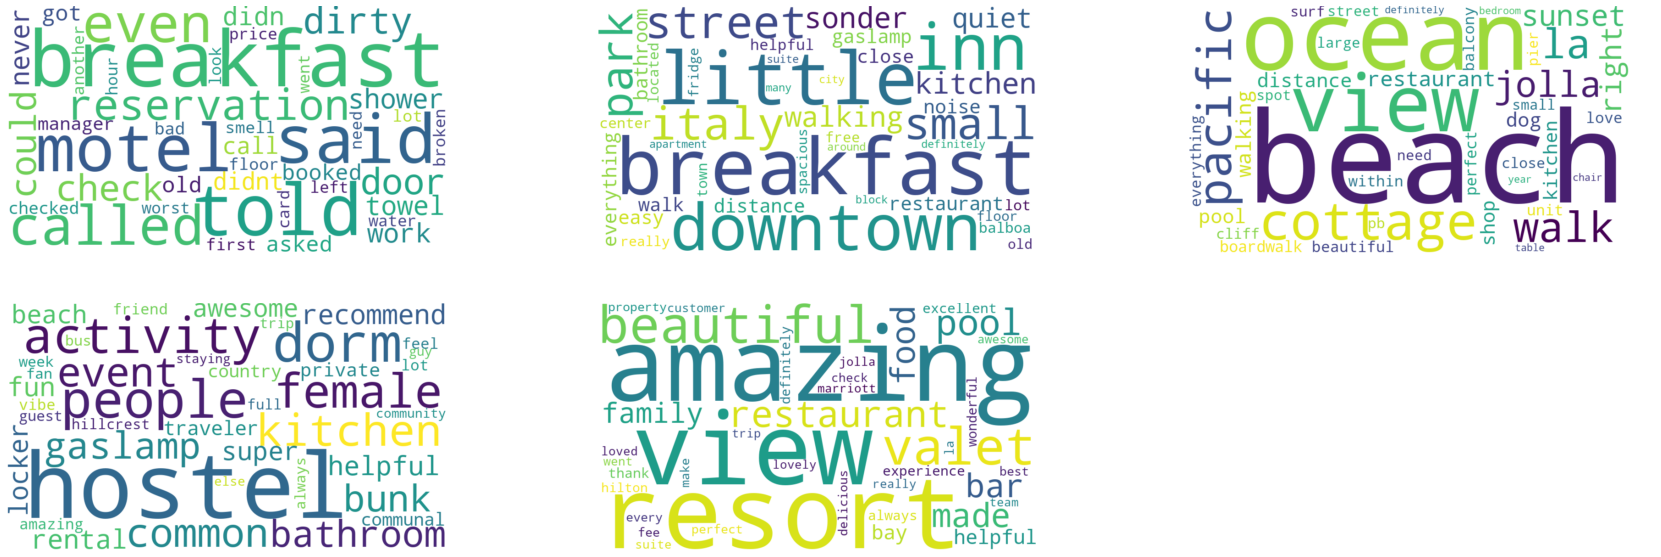

In [48]:
wordcloud_topics(nmf_summary_model, tfidf_summary_vectorizer.get_feature_names_out())

#### Wordcloud for the LDA Topic Model

if


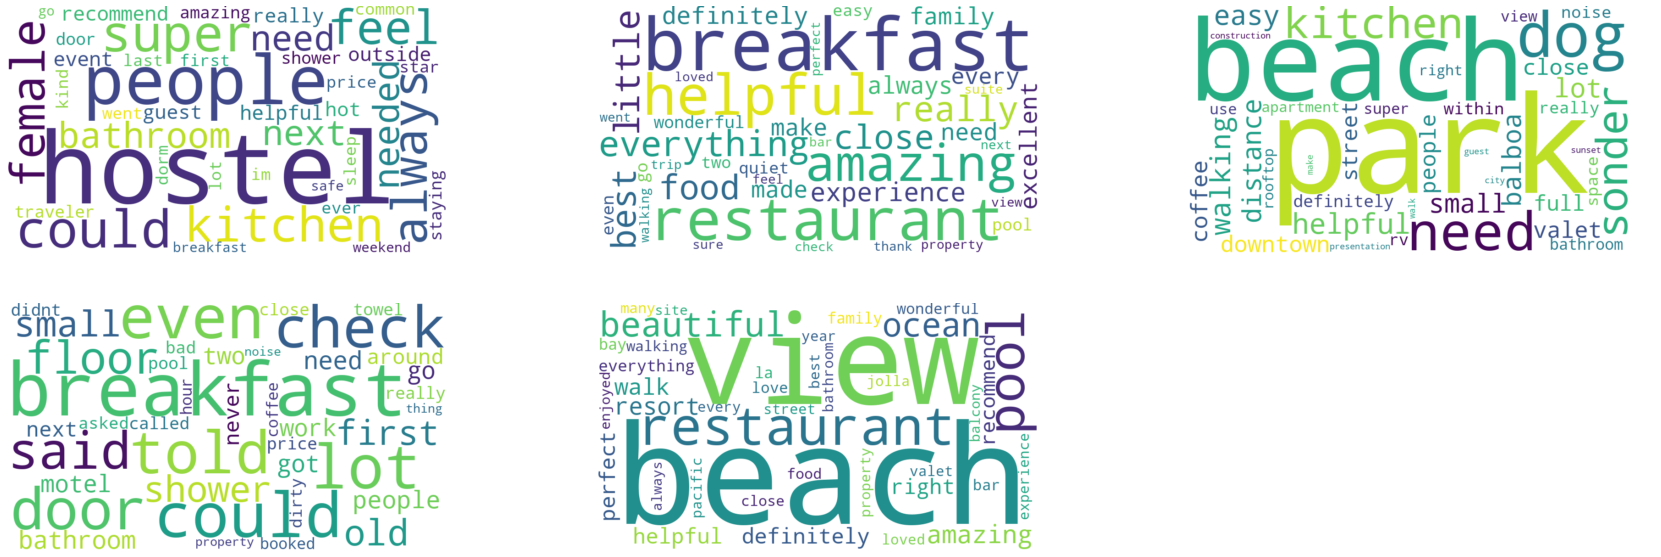

In [49]:
wordcloud_topics(LDA_summary_model, count_summary_vectorizer.get_feature_names_out())

- For topic models, the topic words were compared for each model. A word cloud was displayed to make the comparison easier. Based on the topics words, certain topics overlap with each other.

## Recommended Next Steps

- The next steps will be to improve the accuracy of each model by hypertuning the parameters. GridSearch can be implemented to identify the best LDA and NMF model. 